In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
df = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [53]:
df.rename(columns = {'#Passengers':'Passengers'}, inplace = True)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [54]:
df.shape

(144, 2)

In [55]:
df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)

In [56]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [57]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


# **Time series characteristics**

In [66]:
df = df.drop(columns = 'Month')

# Trend


Text(0.5, 1.0, 'Trend of the Time Series')

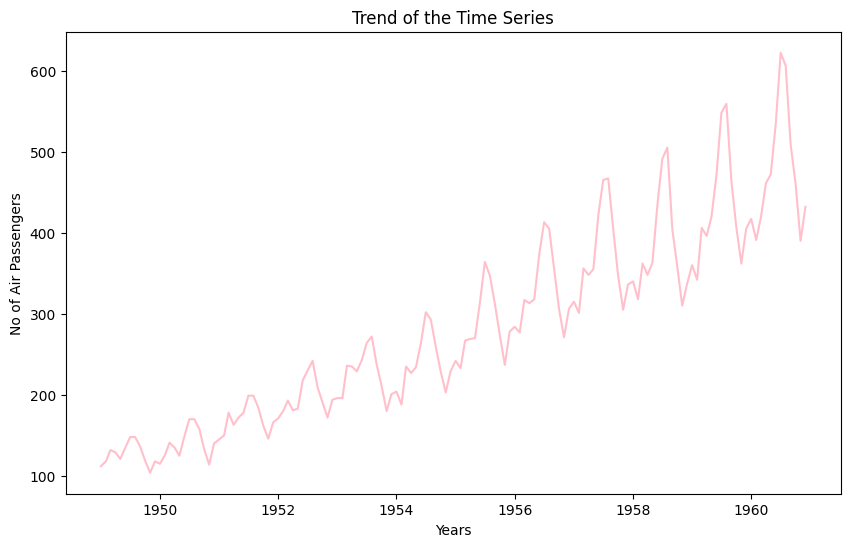

In [67]:
plt.figure(figsize=(10,6))
plt.plot(df, color = 'pink')
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title("Trend of the Time Series")

# ****Missing value treatment****

# > Mean imputation

In [82]:
df['Passengers_Mean_Imputation'] = df['Passengers'].fillna(df['Passengers'].mean())

Text(0.5, 1.0, 'Trend of the Time Series')

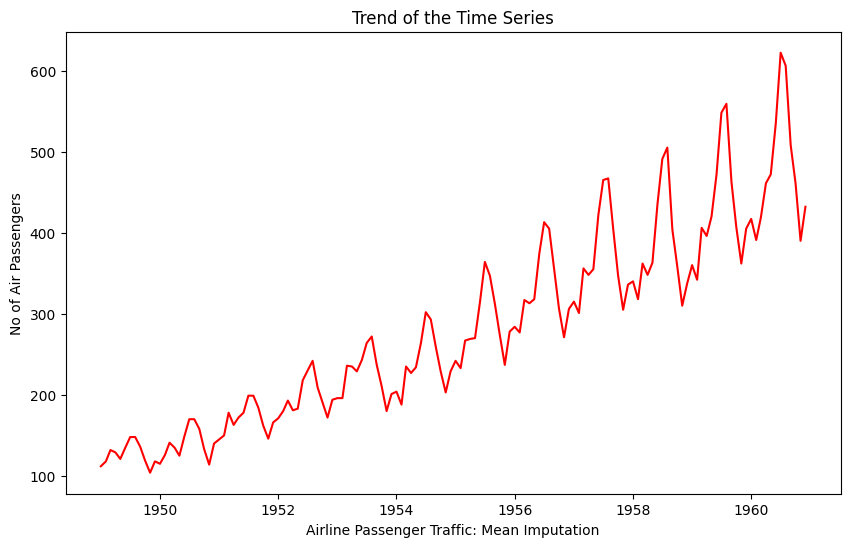

In [104]:
plt.figure(figsize=(10,6))
plt.plot(df['Passengers_Mean_Imputation'], color = 'red')
plt.xlabel('Airline Passenger Traffic: Mean Imputation')
plt.ylabel('No of Air Passengers')
plt.title("Trend of the Time Series")

# > Linear interpolation

In [99]:
df['Passengers_Linear_Interpolation'] = df['Passengers'].interpolate(method='linear')

Text(0.5, 1.0, 'Trend of the Time Series')

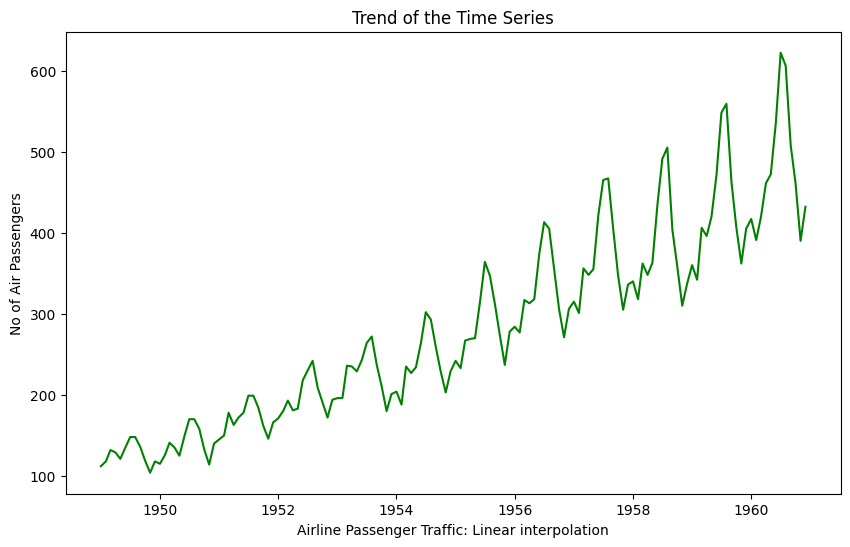

In [103]:
plt.figure(figsize=(10,6))
plt.plot(df['Passengers_Mean_Imputation'], color = 'green')
plt.xlabel('Airline Passenger Traffic: Linear interpolation')
plt.ylabel('No of Air Passengers')
plt.title("Trend of the Time Series")

In [106]:
df.head()

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112,112,112
1949-02-01,118,118,118
1949-03-01,132,132,132
1949-04-01,129,129,129
1949-05-01,121,121,121


In [107]:
df['Passengers'] = df['Passengers_Linear_Interpolation']
df.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# outlier detection

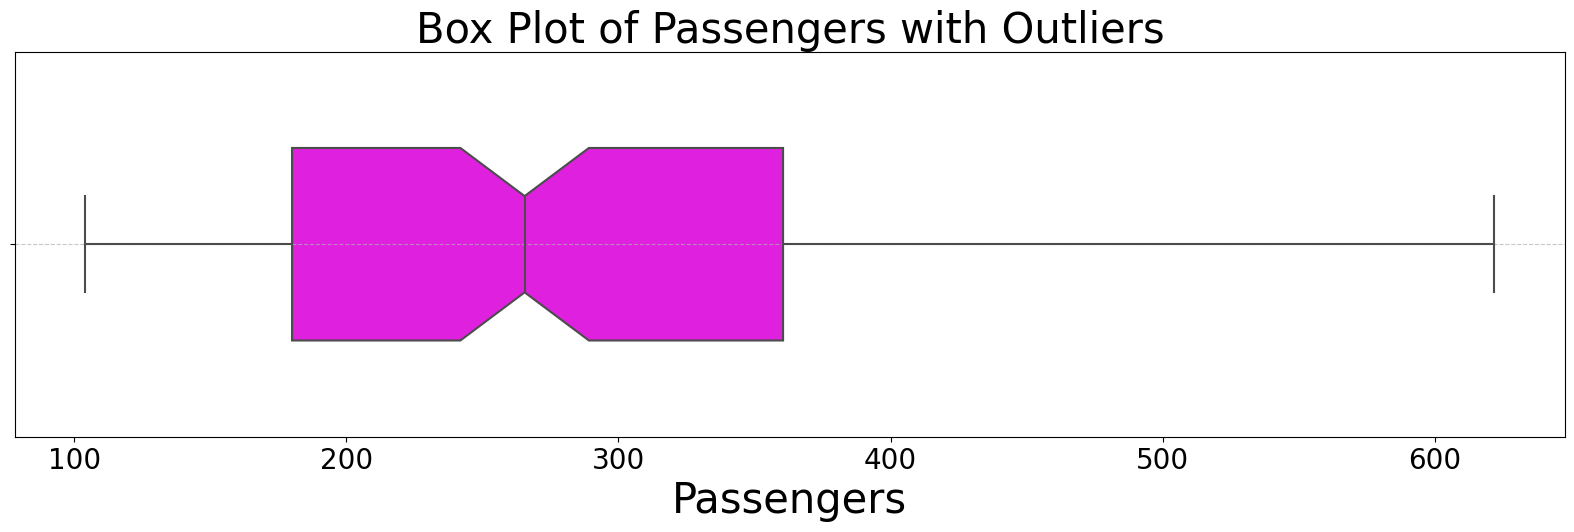

In [115]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Passengers'], color = 'magenta', width = 0.5, notch = True)
plt.title('Box Plot of Passengers with Outliers', fontsize = 30)
plt.xlabel('Passengers', fontsize = 30)
plt.xticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

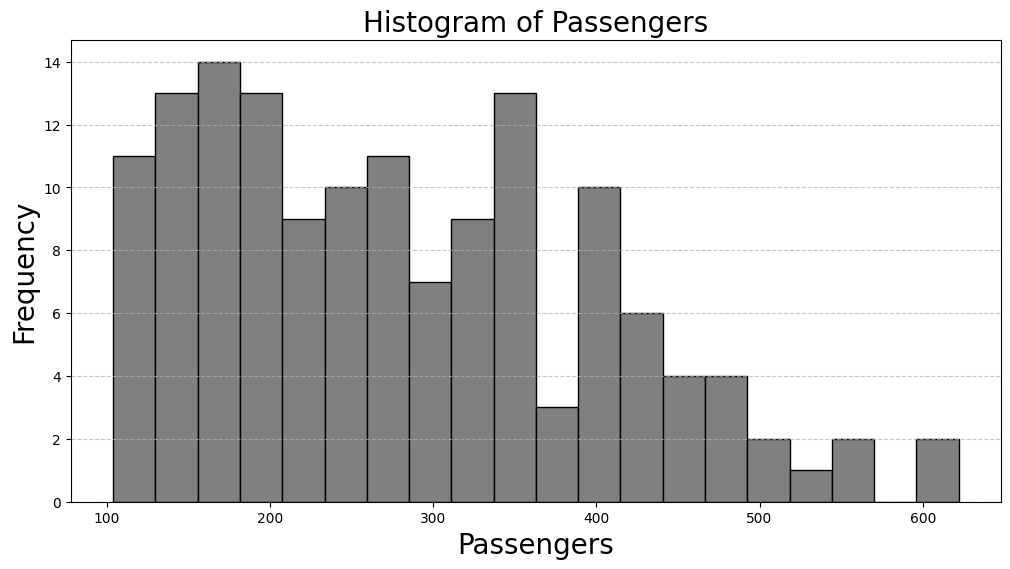

In [119]:
plt.figure(figsize=(12, 6))
plt.hist(df['Passengers'], bins=20, color='grey', edgecolor='black')

plt.title('Histogram of Passengers',fontsize = 20)
plt.xlabel('Passengers',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# seasonality

In [120]:
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

In [109]:
df_temp.head()

,Passengers,Year,Month
Month,,,
1949-01-01,112,1949,1
1949-02-01,118,1949,2
1949-03-01,132,1949,3
1949-04-01,129,1949,4
1949-05-01,121,1949,5


<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='Passengers'>

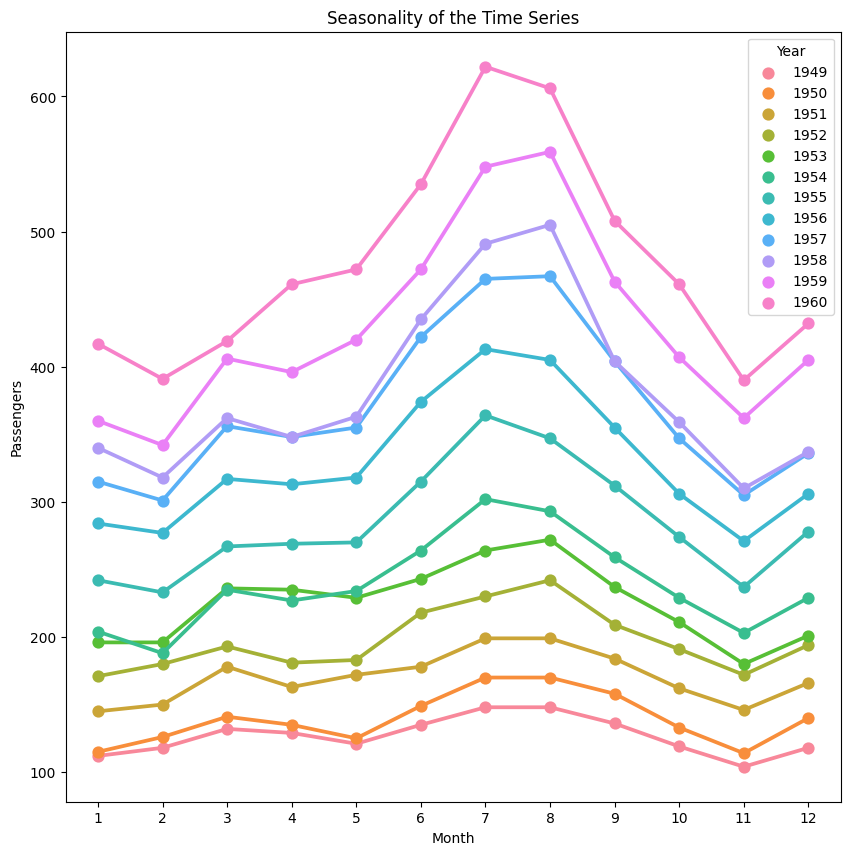

In [91]:
plt.figure(figsize = (10,10))
plt.title("Seasonality of the Time Series")
sns.pointplot(x='Month', y='Passengers', hue='Year', data = df_temp)

# Decomposition of time series

# additive

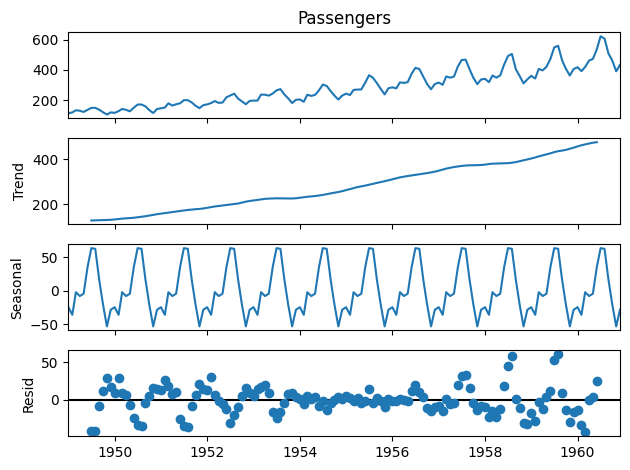

In [92]:
decomposition = seasonal_decompose(df['Passengers'], model = 'additive')
fig=decomposition.plot()

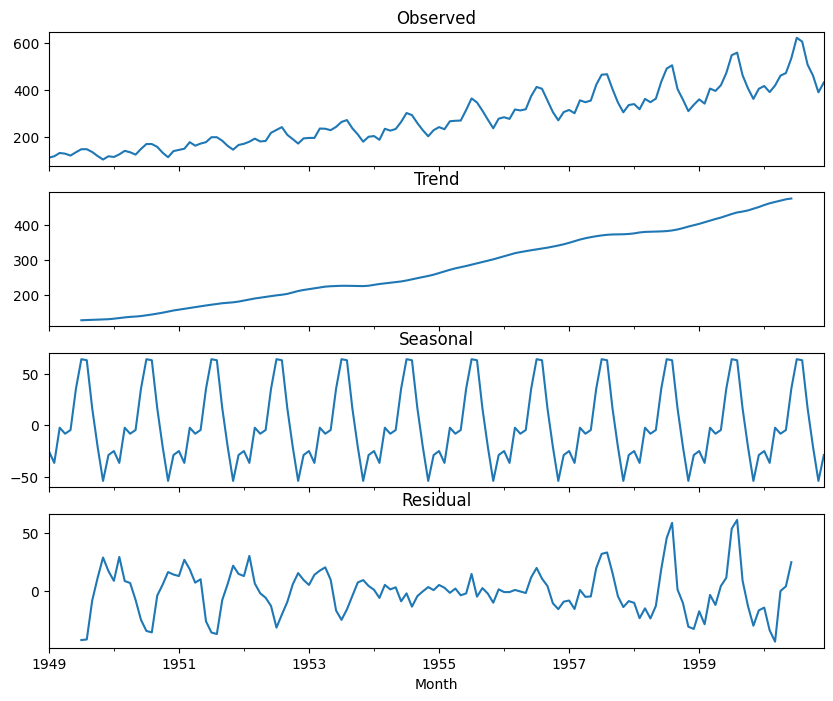

In [94]:
result = seasonal_decompose(df['Passengers'], model='additive') 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')

plt.show()

# multiplicative


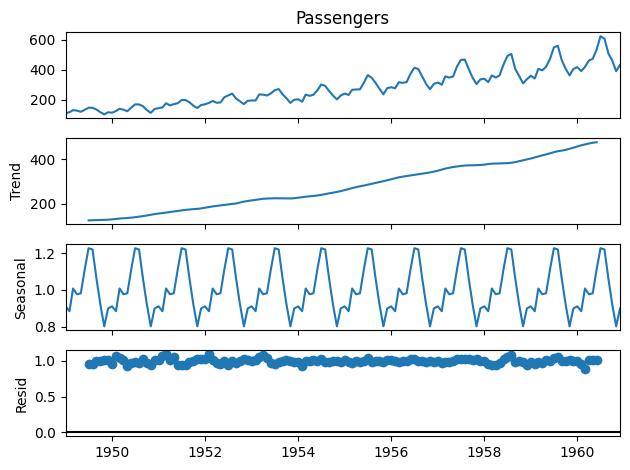

In [93]:
decomposition = seasonal_decompose(df['Passengers'], model = 'multiplicative')
fig=decomposition.plot()

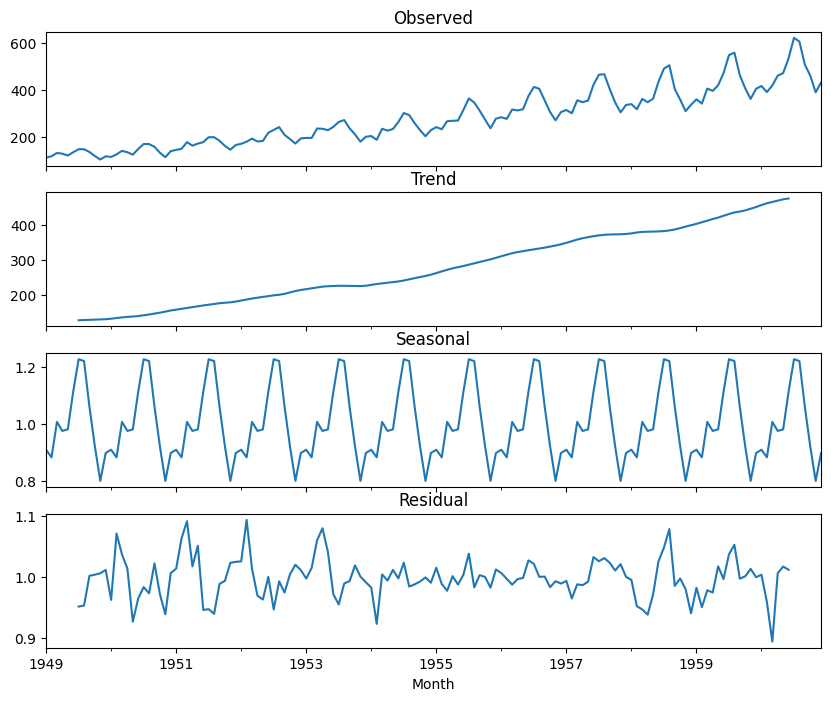

In [95]:
result = seasonal_decompose(df['Passengers'], model='multiplicative') 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')

plt.show()

# Time series analysis

# stationarity

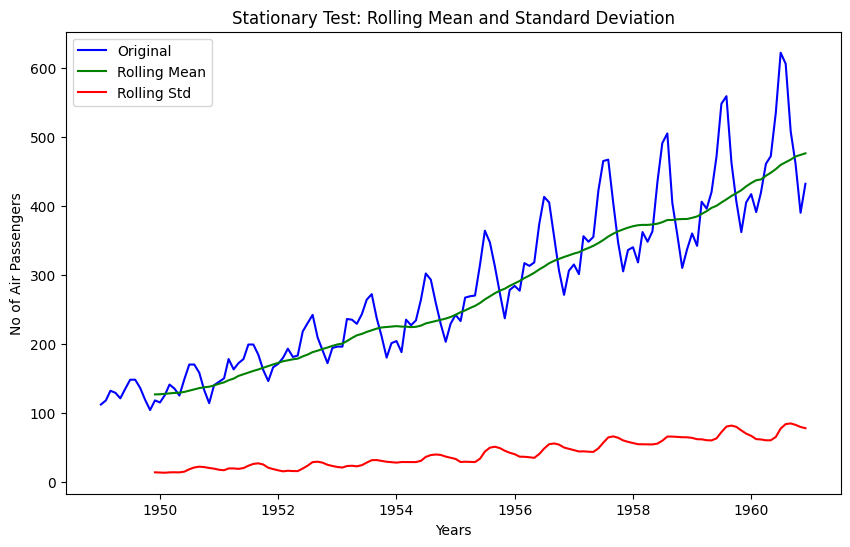

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [96]:
from statsmodels.tsa.stattools import adfuller
timeseries = df['Passengers']

def stationarity_test(timeseries):
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='green', label='Rolling Mean')
    plt.plot(rolling_std, color='red', label='Rolling Std')
    plt.legend()
    plt.show()

    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)

    return rolling_mean, rolling_std

# Call the stationarity_test function with your time series
rolling_mean, rolling_std = stationarity_test(timeseries)

# Differencing

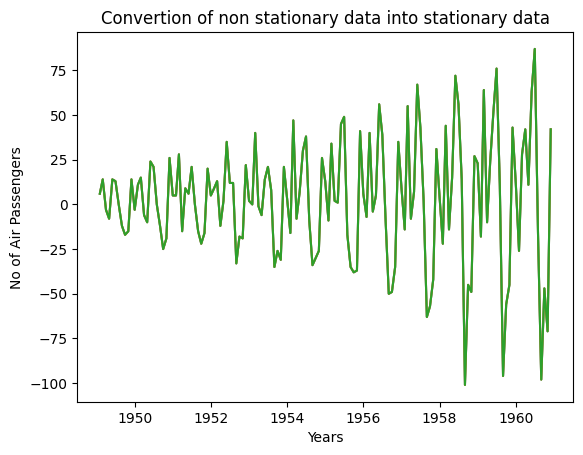

In [97]:
df_diff = df.diff(periods = 1)

plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Convertion of non stationary data into stationary data')
plt.plot(df_diff)


# drop NA values

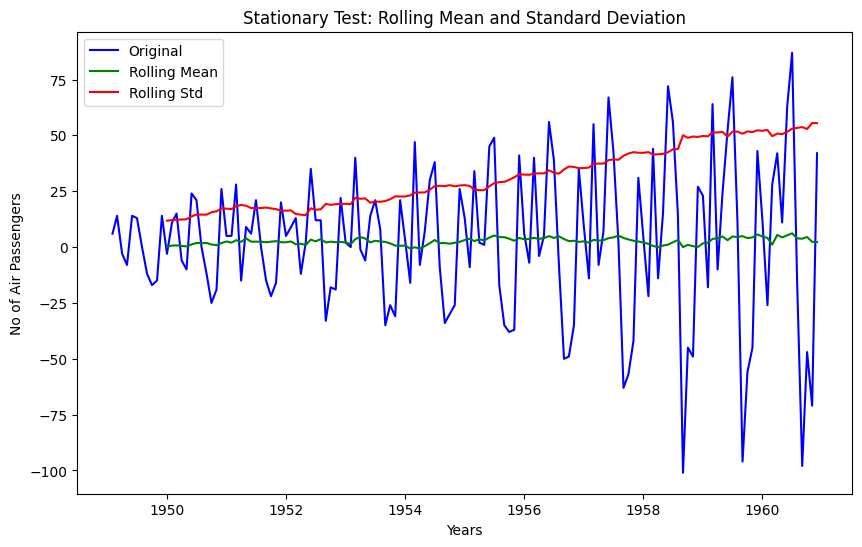

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


(Month
 1949-02-01         NaN
 1949-03-01         NaN
 1949-04-01         NaN
 1949-05-01         NaN
 1949-06-01         NaN
                 ...   
 1960-08-01    3.916667
 1960-09-01    3.750000
 1960-10-01    4.500000
 1960-11-01    2.333333
 1960-12-01    2.250000
 Name: Passengers, Length: 143, dtype: float64,
 Month
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
                 ...    
 1960-08-01    53.364030
 1960-09-01    53.706483
 1960-10-01    52.852281
 1960-11-01    55.531045
 1960-12-01    55.465182
 Name: Passengers, Length: 143, dtype: float64)

In [98]:
df_diff.dropna(inplace = True)

column_name = 'Passengers'
stationarity_test(df_diff[column_name])

# time series forecast

> split time series data into test and train

In [121]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [122]:
train_len = 120
train = df[:train_len]
test= df[train_len:]

# simple time series methods

# naive method

In [141]:
y_hat_naive  = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'].iloc[-1]

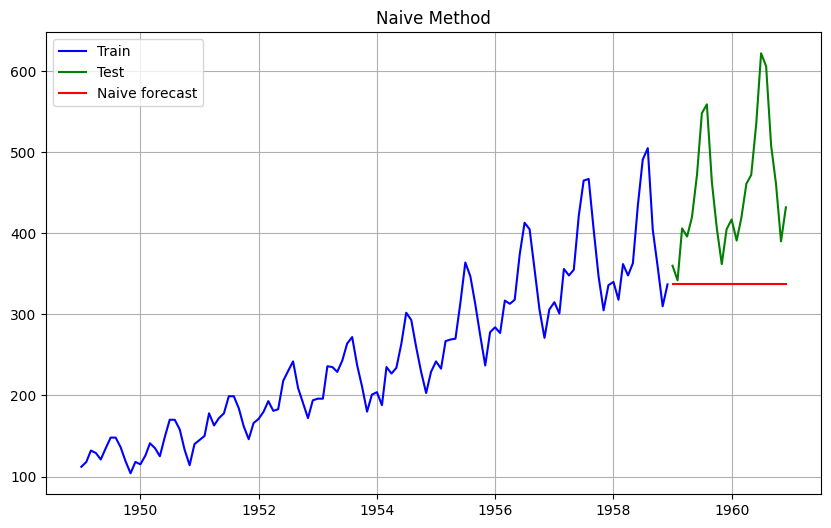

In [142]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(train['Passengers'], label='Train', color='blue')
plt.plot(test['Passengers'], label='Test', color='green')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast', linestyle='-', color='red')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)
results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58


# simple average method

In [143]:
y_hat_avg  = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [144]:
y_hat_avg.head()

,Passengers,avg_forecast
Month,,
1959-01-01,360,245.908333
1959-02-01,342,245.908333
1959-03-01,406,245.908333
1959-04-01,396,245.908333
1959-05-01,420,245.908333


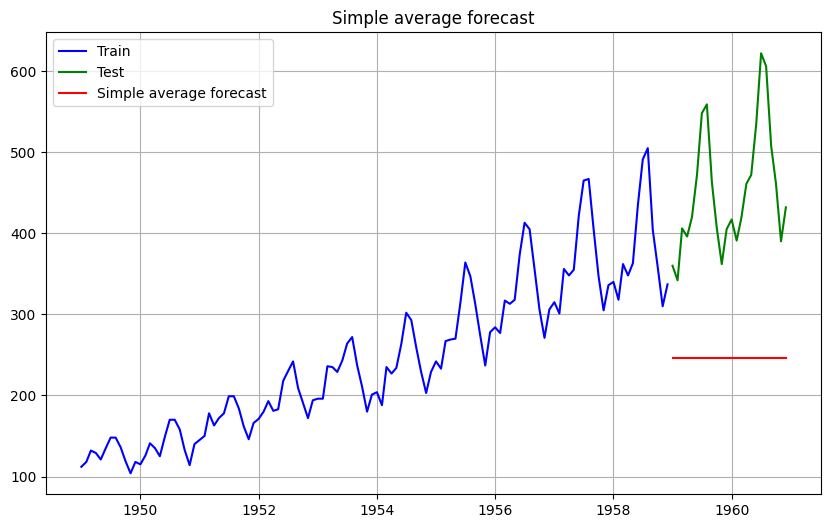

In [145]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(train['Passengers'], label='Train', color='blue')
plt.plot(test['Passengers'], label='Test', color='green')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast', linestyle='-', color='red')
plt.legend(loc='best')
plt.title('Simple average forecast')
plt.show()

In [146]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
0,Simple average method,219.44,44.23
0,Simple moving average forecast,72.40,11.23
0,Simple average method,219.44,44.23


# moving average method

In [151]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast']=df['Passengers'].rolling(ma_window).mean()

In [136]:
y_hat_sma.head()

,Passengers,sma_forecast
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN


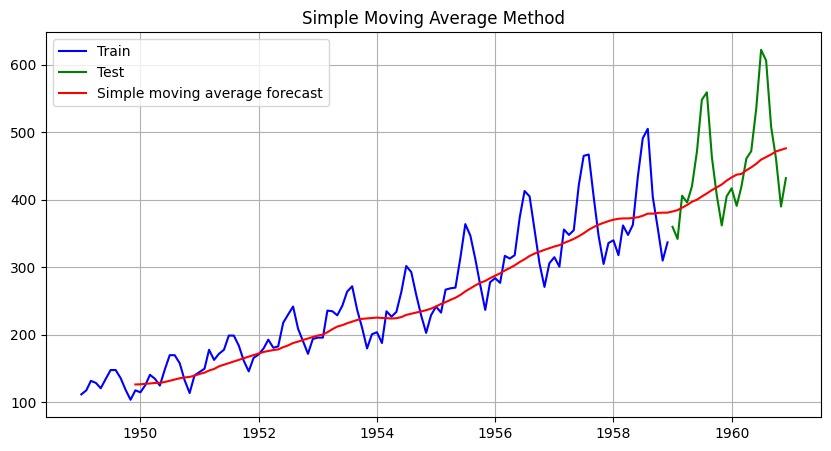

In [152]:
#Plot train, test and forecast
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(train['Passengers'], label='Train',color='blue')
plt.plot(test['Passengers'], label='Test',color='green')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast',linestyle='-', color='red')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [139]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
0,Simple average method,219.44,44.23
0,Simple moving average forecast,72.40,11.23


# simple exponential smoothing

In [153]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [155]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast']=model_fit.forecast(24)

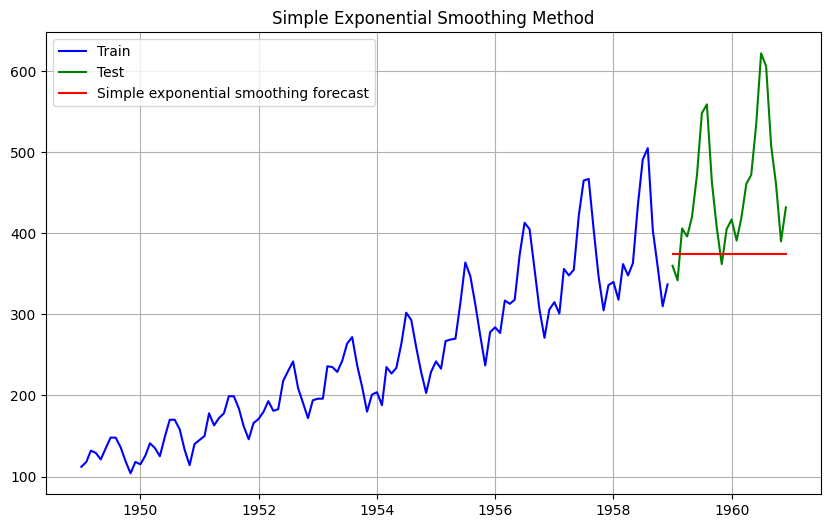

In [156]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(train['Passengers'], label='Train', color='blue')
plt.plot(test['Passengers'], label='Test',color='green')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast',color='red')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [158]:
results = pd.DataFrame(columns=['Method', 'RMSE', 'MAPE'])
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })


In [159]:
results = pd.concat([results, tempResults])
results

/tmp/ipykernel_34/3425709585.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, tempResults])


,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,107.52,16.43


# Holt moving with trend

In [160]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.46666666666661, 'initial_trend': 2.060606060606071, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/tmp/ipykernel_34/3162401862.py:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)


In [161]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

In [162]:
y_hat_holt.head()

,Passengers,holt_forecast
Month,,
1959-01-01,360,386.846352
1959-02-01,342,389.042211
1959-03-01,406,391.238071
1959-04-01,396,393.433931
1959-05-01,420,395.629791


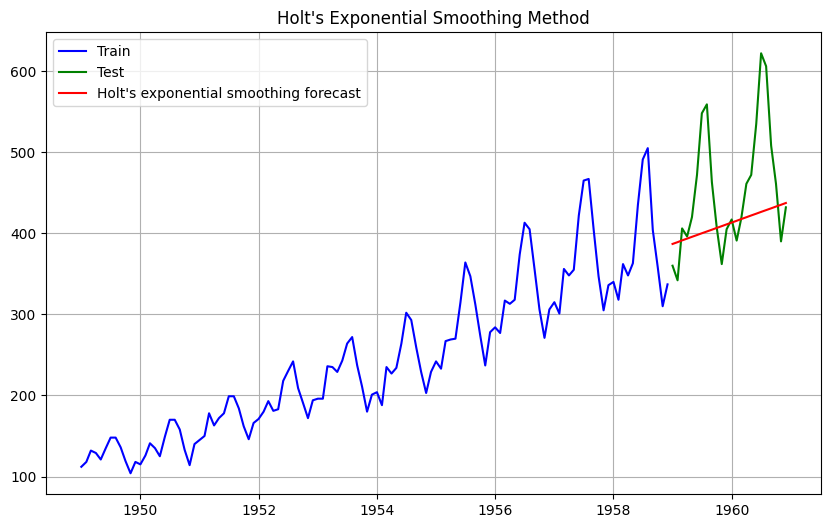

In [163]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot( train['Passengers'], label='Train',color='blue')
plt.plot(test['Passengers'], label='Test',color='green')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast',color='red')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()


In [164]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,107.52,16.43
0,Holt's exponential smoothing method,80.90,11.32


# holts winters additive method with trend and seasonility

In [165]:
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.23676881757213708, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.7632311824278629, 'damping_trend': nan, 'initial_level': 119.18319766289831, 'initial_trend': 2.2768108515171583, 'initial_seasons': array([ -9.45944021,  -3.87032298,   8.71376394,   3.69617498,
        -4.92883985,   9.26760756,  21.52570101,  19.19081421,
         5.07129814, -13.80700791, -28.50923536, -12.35950034]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [166]:
y_hat_hwa = test.copy()
forecast_values = model_fit.forecast(len(test))
y_hat_hwa['hw_forecast'] = forecast_values

In [167]:
y_hat_hwa.head()

,Passengers,hw_forecast
Month,,
1959-01-01,360,354.173073
1959-02-01,342,337.572189
1959-03-01,406,387.773083
1959-04-01,396,379.773380
1959-05-01,420,397.211572


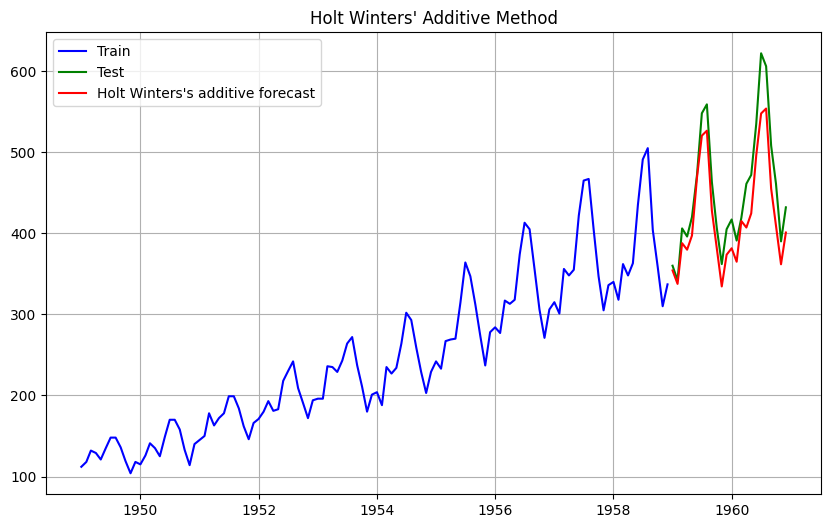

In [169]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot( train['Passengers'], label='Train',color='blue')
plt.plot(test['Passengers'], label='Test',color='green')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast',color='red')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [170]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,107.52,16.43
0,Holt's exponential smoothing method,80.90,11.32
0,Holt Winters' additive method,35.76,6.64


# Holt Winter's multiplicative method with trend and seasonality

In [171]:
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.36420653352876814, 'smoothing_trend': 4.6284185891306544e-09, 'smoothing_seasonal': 0.6357934650547438, 'damping_trend': nan, 'initial_level': 112.35295621011441, 'initial_trend': 2.4209365986790257, 'initial_seasons': array([0.97581414, 1.02563349, 1.12732123, 1.07276702, 0.99305149,
       1.09006918, 1.18864767, 1.17453843, 1.07150164, 0.9335212 ,
       0.82912013, 0.95563229]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [172]:
y_hat_hwm = test.copy()
forecast_values = model_fit.forecast(len(test))
y_hat_hwm['hw_forecast'] = forecast_values

In [173]:
y_hat_hwm.head()

,Passengers,hw_forecast
Month,,
1959-01-01,360,350.959650
1959-02-01,342,333.629611
1959-03-01,406,387.807524
1959-04-01,396,380.139590
1959-05-01,420,398.089270


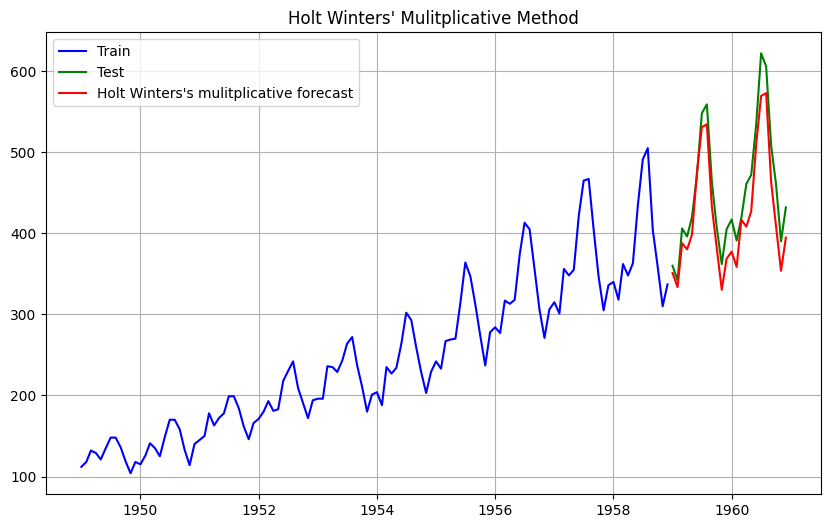

In [174]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot( train['Passengers'], label='Train',color='blue')
plt.plot(test['Passengers'], label='Test',color='green')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast',color='red')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [175]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,107.52,16.43
0,Holt's exponential smoothing method,80.90,11.32
0,Holt Winters' additive method,35.76,6.64
0,Holt Winters' multiplicative method,32.49,6.39


# regressive models

# Stationarity vs non-stationary time series

In [176]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


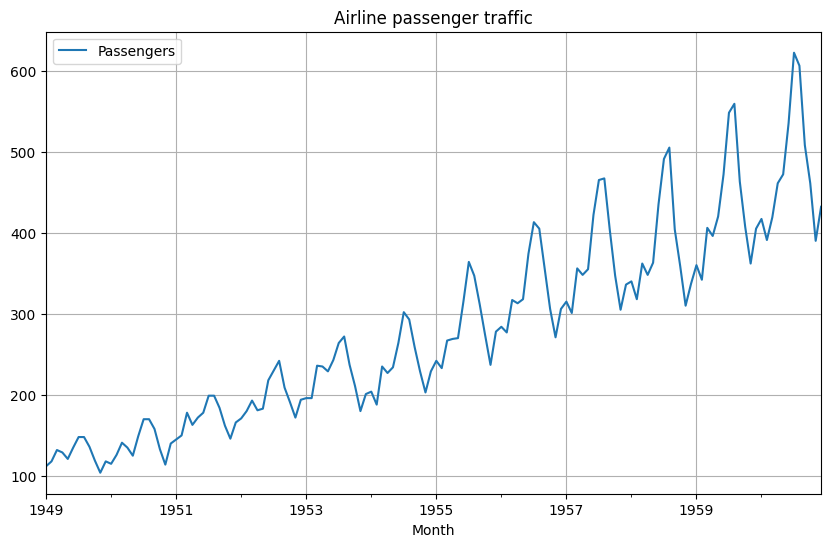

In [178]:
df['Passengers'].plot(figsize=(10, 6))
plt.grid()
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

# Augmented Dickey-Fuller (ADF) test

In [180]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Passengers'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.815369
Critical Values @ 0.05: -2.88
p-value: 0.991880


# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [181]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Passengers'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.651312
Critical Values @ 0.05: 0.46
p-value: 0.010000


/tmp/ipykernel_34/1314021061.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df['Passengers'])


# Box Cox transformation to make variance constant


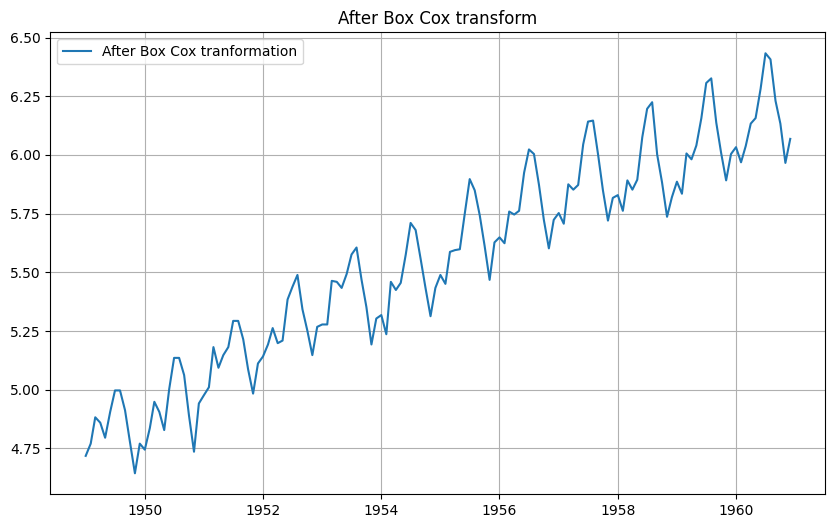

In [183]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df['Passengers'], lmbda=0), index = df.index)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

# Differencing to remove trend

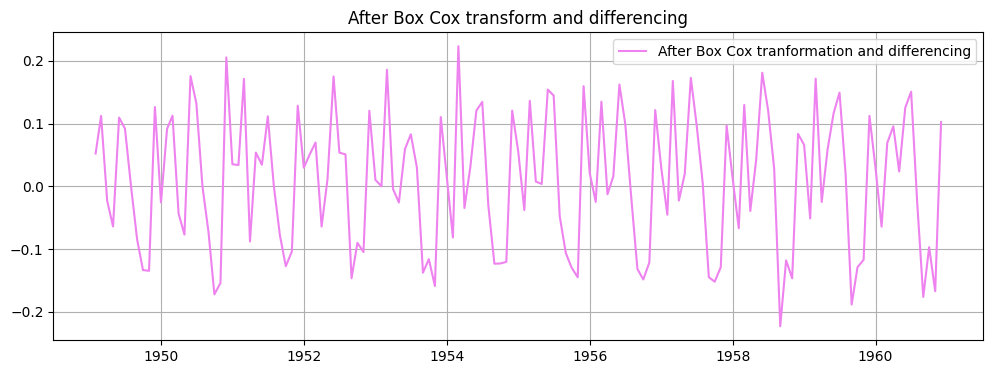

In [186]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df.index)
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing',color='violet')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [187]:
data_boxcox_diff.dropna(inplace=True)
data_boxcox_diff.tail()

Month
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
dtype: float64

# Augmented Dickey-Fuller (ADF) test

In [188]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.717131
Critical Values @ 0.05: -2.88
p-value: 0.071121


# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [189]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.038304
Critical Values @ 0.05: 0.46
p-value: 0.100000


/tmp/ipykernel_34/3639712988.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(data_boxcox_diff)


# Autocorrelation function (ACF)

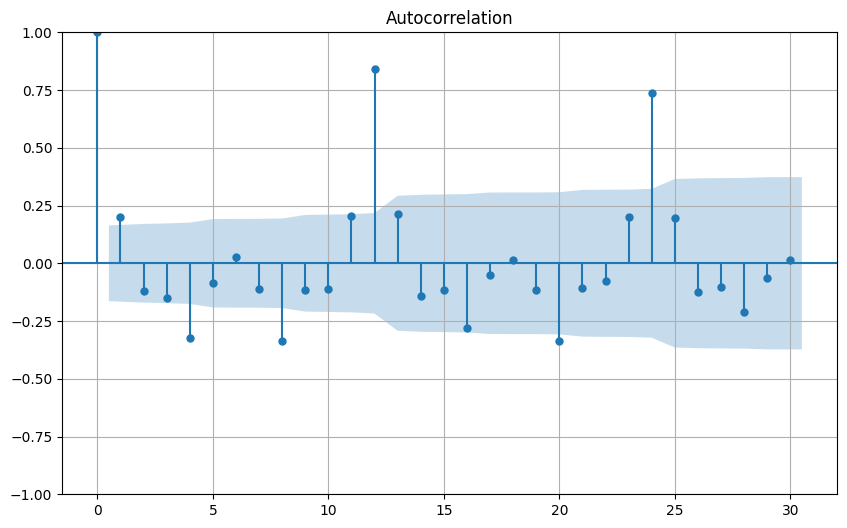

In [192]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,6))
plt.grid()
plot_acf(data_boxcox_diff, ax=plt.gca(), lags =30)
plt.show()

# Partial autocorrelation function (PACF)

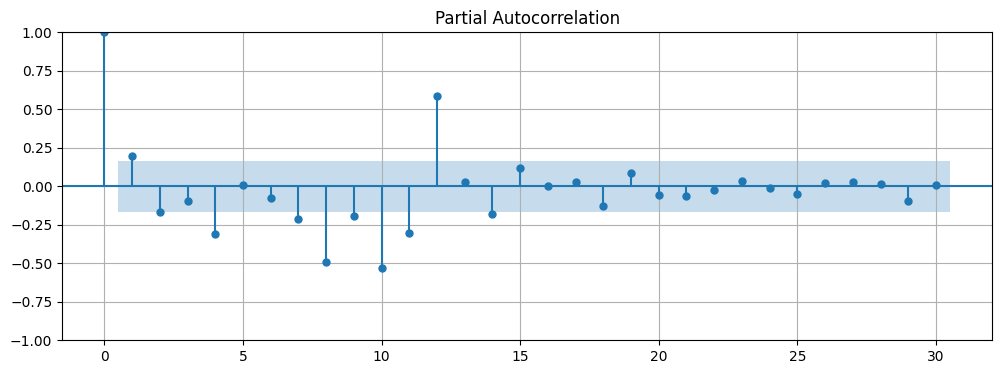

In [193]:

from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plt.grid()
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [194]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [195]:
train_data_boxcox_diff[:10]

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
dtype: float64

# Auto regression method (AR)

In [196]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.params)

const     0.009473
ar.L1     0.182911
sigma2    0.010733
dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/tmp/ipykernel_34/718805381.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])


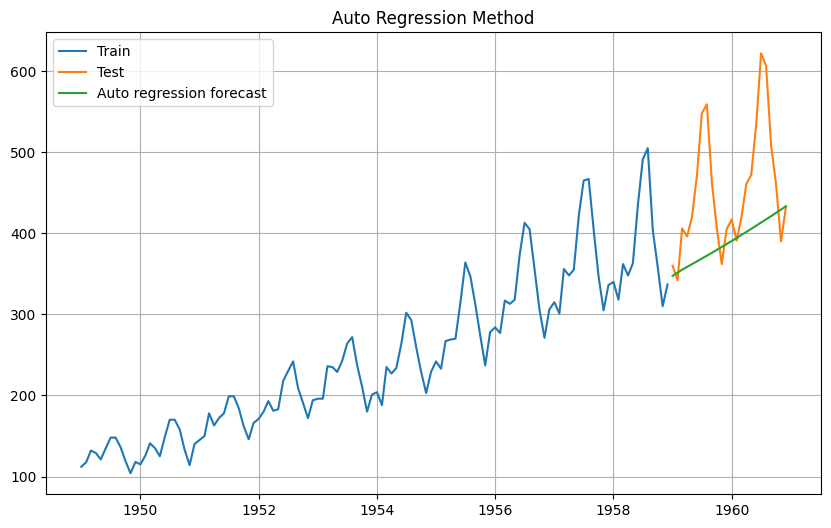

In [198]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [199]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100,2)
results = pd.DataFrame(columns=['Method', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

/tmp/ipykernel_34/4131525439.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, tempResults])


,Method,RMSE,MAPE
0,Autoregressive (AR) method,93.42,13.72


# Moving average method (MA)

In [200]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.009523
ma.L1     0.258490
sigma2    0.010579
dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/tmp/ipykernel_34/3891744392.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])


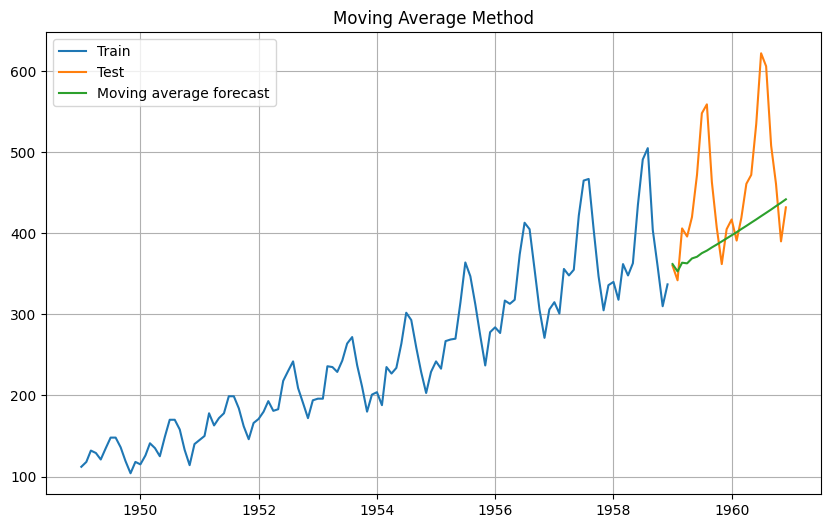

In [207]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(df['Passengers'][:train_len], label='Train')
plt.plot(df['Passengers'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [203]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,93.42,13.72
0,Moving Average (MA) method,91.61,13.40


# Auto regression integrated moving average method (ARIMA)

In [204]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.009628
ar.L1    -0.581788
ma.L1     0.837584
sigma2    0.010129
dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/tmp/ipykernel_34/3992332733.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])


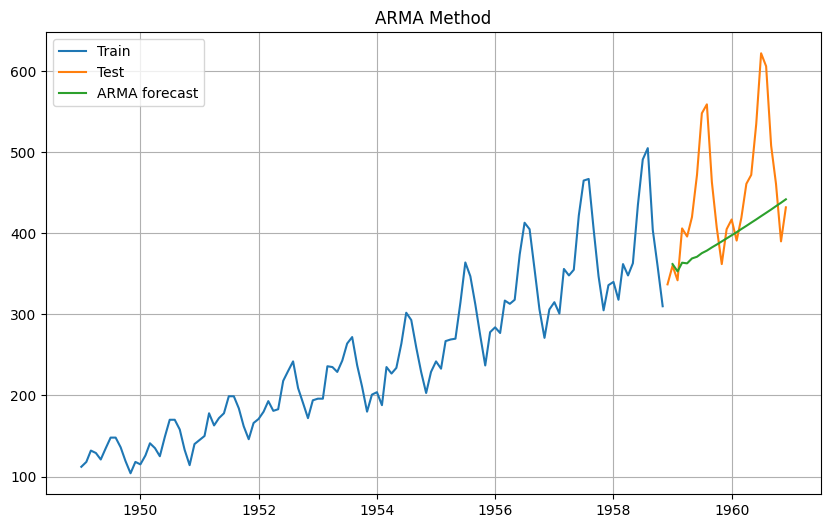

In [208]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])
plt.figure(figsize=(10,6))
plt.grid()
plt.plot( df['Passengers'][:train_len-1], label='Train')
plt.plot(df['Passengers'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()


In [210]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][train_len-1:])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Autoregressive inttegrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,93.42,13.72
0,Moving Average (MA) method,91.61,13.40
0,Autoregressive moving average (ARMA) method,88.74,12.81
0,Autoregressive inttegrated moving average (ARI...,88.74,12.81


# Seasonal auto regressive integrated moving average (SARIMA)

In [211]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61271D+00    |proj g|=  4.53288D+00

At iterate    5    f= -1.62808D+00    |proj g|=  1.16978D+00

At iterate   10    f= -1.63884D+00    |proj g|=  2.91713D-02

At iterate   15    f= -1.64366D+00    |proj g|=  9.17421D-02

At iterate   20    f= -1.64521D+00    |proj g|=  3.61289D-02

At iterate   25    f= -1.64533D+00    |proj g|=  3.87701D-03

At iterate   30    f= -1.64533D+00    |proj g|=  9.27970D-03

At iterate   35    f= -1.64534D+00    |proj g|=  3.75607D-02

At iterate   40    f= -1.64552D+00    |proj g|=  3.67851D-01

At iterate   45    f= -1.64680D+00    |proj g|=  7.58483D-02

At iterate   50    f= -1.64766D+00    |proj g|=  5.92739D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


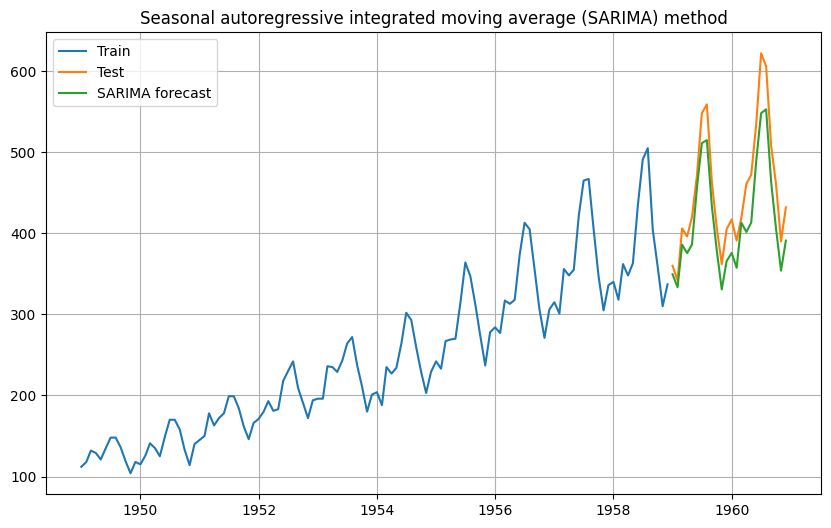

In [212]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [213]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,93.42,13.72
0,Moving Average (MA) method,91.61,13.40
0,Autoregressive moving average (ARMA) method,88.74,12.81
0,Autoregressive inttegrated moving average (ARI...,88.74,12.81
0,Seasonal autoregressive integrated moving aver...,39.84,7.79
